In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
df=files.upload()

Saving CleanedDataSet.csv to CleanedDataSet.csv


In [ ]:
df = pd.read_csv("CleanedDataSet.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           1091 non-null   object 
 1   Equipment Class            1091 non-null   object 
 2   Equipment Category         1091 non-null   object 
 3   Service Group              1091 non-null   object 
 4   Department                 1091 non-null   object 
 5   Make                       1091 non-null   object 
 6   Model                      1091 non-null   object 
 7   Year                       1091 non-null   int64  
 8   Site                       1091 non-null   object 
 9   Mileage2024 (km)           833 non-null    float64
 10  HourMeter2024 (hours)      332 non-null    float64
 11  DowntimeHours2024 (hours)  1091 non-null   float64
 12  LaborHours2024 (hours)     1091 non-null   float64
 13  PrimaryMetric              1091 non-null   objec

In [ ]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
1,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
2,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage
3,A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage
4,A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage




---


#Business Q1:How is our fleet distributed and utilized across different user groups or fleet types?



---
#Fleet distribution by user groups


---



##Fleet distribution by Service Group

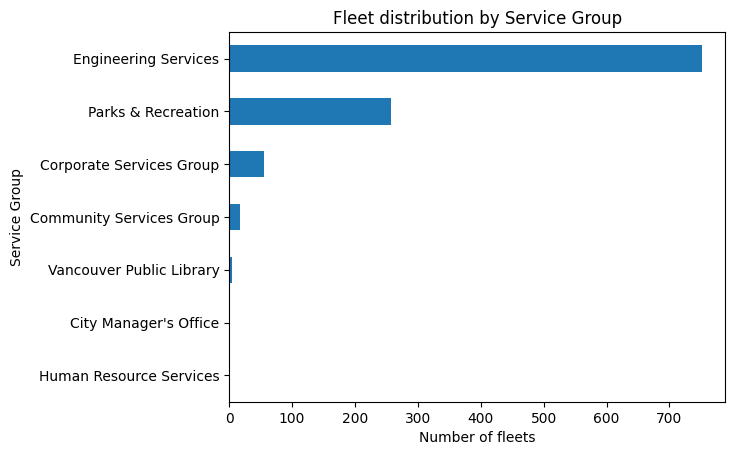

Service Group
Human Resource Services       2
City Manager's Office         2
Vancouver Public Library      5
Community Services Group     18
Corporate Services Group     55
Parks & Recreation          258
Engineering Services        751
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

service_counts = df["Service Group"].value_counts().sort_values(ascending=True)

service_counts.plot(kind="barh")
plt.title("Fleet distribution by Service Group")
plt.xlabel("Number of fleets")
plt.ylabel("Service Group")
plt.show()

print(service_counts)

##Fleet distribution by department

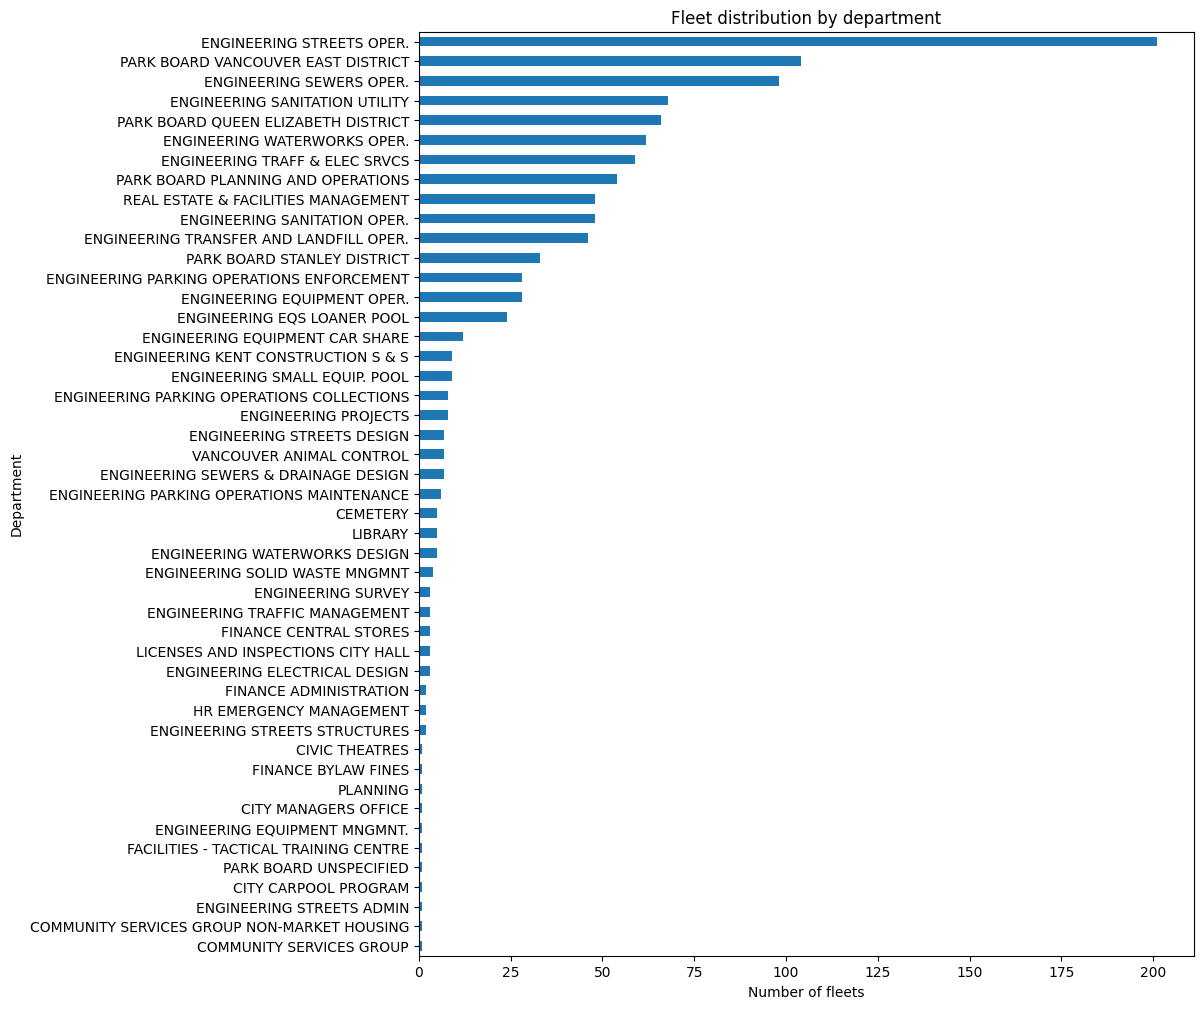

In [ ]:
department_counts = df["Department"].value_counts().sort_values(ascending=True)

department_counts.plot(kind="barh", figsize=(10,12))
plt.title("Fleet distribution by department")
plt.xlabel("Number of fleets")
plt.ylabel("Department")
plt.show()

In [ ]:
department_counts.sort_values(ascending=False)

,count
Department,
ENGINEERING STREETS OPER.,201
PARK BOARD VANCOUVER EAST DISTRICT,104
ENGINEERING SEWERS OPER.,98
ENGINEERING SANITATION UTILITY,68
PARK BOARD QUEEN ELIZABETH DISTRICT,66
ENGINEERING WATERWORKS OPER.,62
ENGINEERING TRAFF & ELEC SRVCS,59
PARK BOARD PLANNING AND OPERATIONS,54
ENGINEERING SANITATION OPER.,48


#Fleet distribution by fleet types



---

##Fleet distribution by Equipment Category

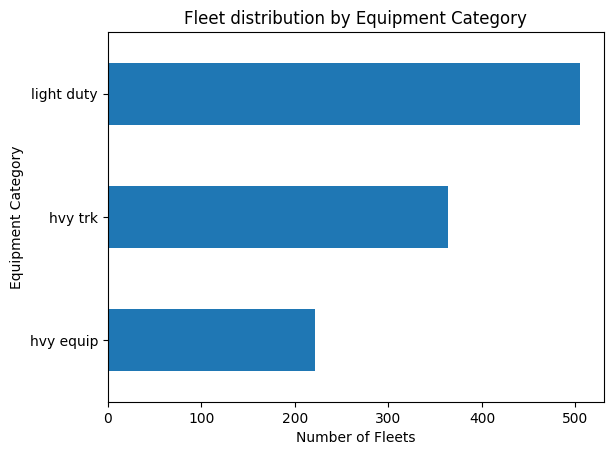

Equipment Category
hvy equip     222
hvy trk       364
light duty    505
Name: count, dtype: int64


In [ ]:
equipment_category_counts = df['Equipment Category'].value_counts().sort_values(ascending=True)

equipment_category_counts.plot(kind="barh")

plt.title("Fleet distribution by Equipment Category")
plt.xlabel("Number of Fleets")
plt.ylabel("Equipment Category")
plt.show()

print(equipment_category_counts)

#Business Q2: What insights can we draw about equipment downtime and labor costs across categories?

##Equipment Downtime across equipment category

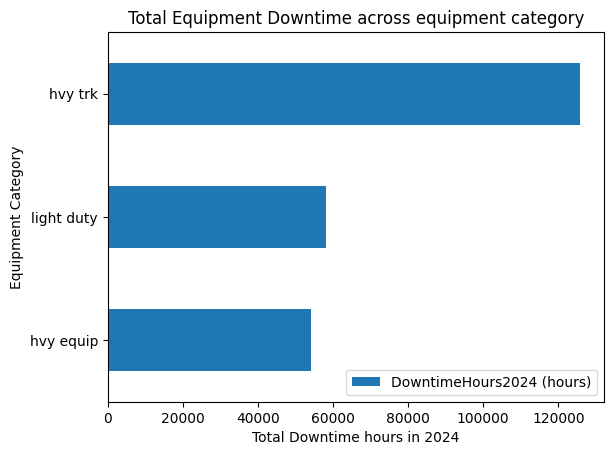

                    DowntimeHours2024 (hours)
Equipment Category                           
hvy equip                        54110.164330
light duty                       57995.213585
hvy trk                         125826.296890


In [ ]:
downtime_by_category = df.groupby("Equipment Category").agg({"DowntimeHours2024 (hours)": "sum"})
downtime_by_category.sort_values(by="DowntimeHours2024 (hours)", inplace=True)

downtime_by_category.plot(kind="barh")
plt.title("Total Equipment Downtime across equipment category")
plt.xlabel("Total Downtime hours in 2024")
plt.ylabel("Equipment Category")
plt.show()

print(downtime_by_category)

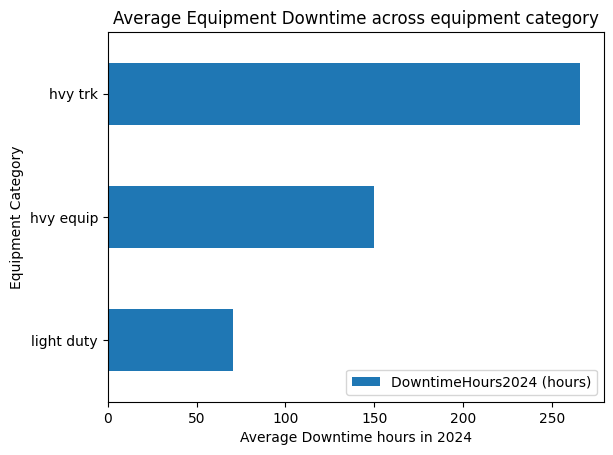

                    DowntimeHours2024 (hours)
Equipment Category                           
light duty                          70.408056
hvy equip                          149.878612
hvy trk                            265.909167


In [ ]:
downtime_by_category = df.groupby("Equipment Category").agg({"DowntimeHours2024 (hours)": "median"})
downtime_by_category.sort_values(by="DowntimeHours2024 (hours)", inplace=True)

downtime_by_category.plot(kind="barh")
plt.title("Average Equipment Downtime across equipment category")
plt.xlabel("Average Downtime hours in 2024")
plt.ylabel("Equipment Category")
plt.show()

print(downtime_by_category)

In [ ]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
1,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
2,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage
3,A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage
4,A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage


##Downtime across Service Group

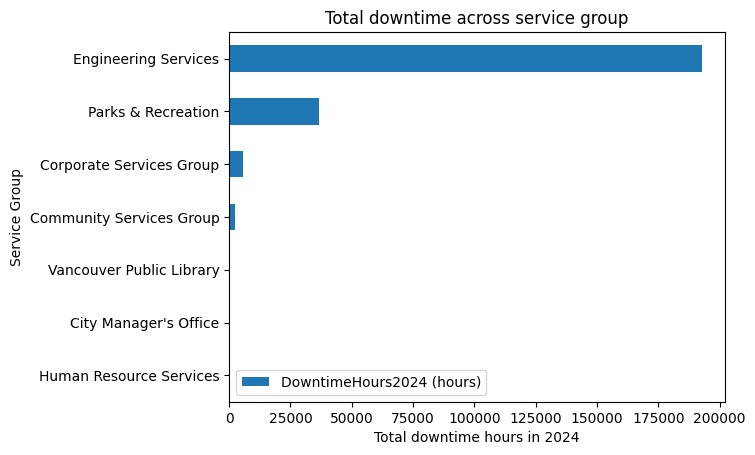

                          DowntimeHours2024 (hours)
Service Group                                      
Human Resource Services                   68.942222
City Manager's Office                    261.875833
Vancouver Public Library                 324.351942
Community Services Group                2372.337499
Corporate Services Group                5574.711371
Parks & Recreation                     36685.876915
Engineering Services                  192643.579023


In [ ]:
downtime_by_serviceGroup = df.groupby("Service Group").agg({"DowntimeHours2024 (hours)": "sum"})
downtime_by_serviceGroup.sort_values("DowntimeHours2024 (hours)", inplace=True)

downtime_by_serviceGroup.plot(kind="barh")
plt.title("Total downtime across service group")
plt.xlabel("Total downtime hours in 2024")
plt.ylabel("Service Group")
plt.show()

print(downtime_by_serviceGroup)

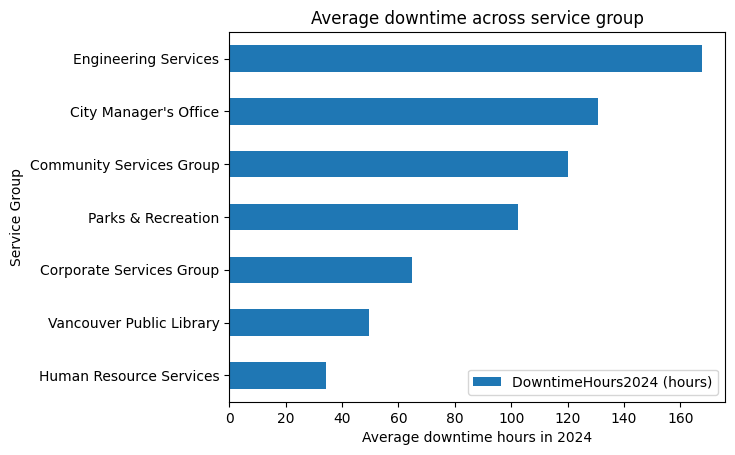

                          DowntimeHours2024 (hours)
Service Group                                      
Human Resource Services                   34.471111
Vancouver Public Library                  49.548331
Corporate Services Group                  64.708889
Parks & Recreation                       102.581806
Community Services Group                 120.293333
City Manager's Office                    130.937916
Engineering Services                     167.495834


In [ ]:
downtime_by_serviceGroup = df.groupby("Service Group").agg({"DowntimeHours2024 (hours)": "median"})
downtime_by_serviceGroup.sort_values("DowntimeHours2024 (hours)", inplace=True)

downtime_by_serviceGroup.plot(kind="barh")
plt.title("Average downtime across service group")
plt.xlabel("Average downtime hours in 2024")
plt.ylabel("Service Group")
plt.show()

print(downtime_by_serviceGroup)

In [ ]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
1,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
2,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage
3,A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage
4,A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage


##Downtimehours across department

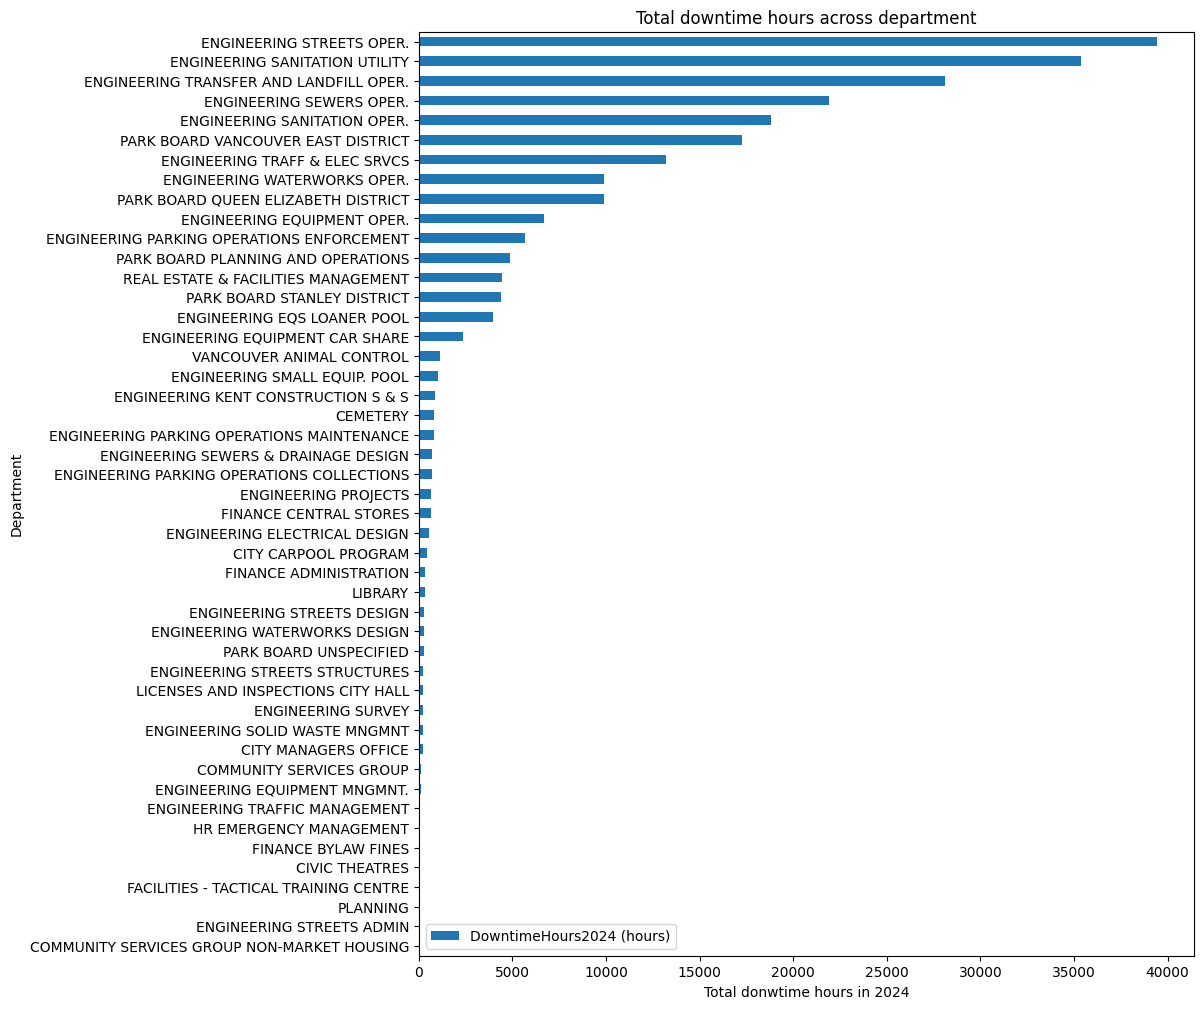

In [ ]:
downtime_by_department = df.groupby("Department").agg({"DowntimeHours2024 (hours)": "sum"})

downtime_by_department.sort_values(by="DowntimeHours2024 (hours)", inplace=True)

downtime_by_department.plot(kind="barh", figsize=(10,12))
plt.title("Total downtime hours across department")
plt.xlabel("Total donwtime hours in 2024")
plt.ylabel("Department")
plt.show()

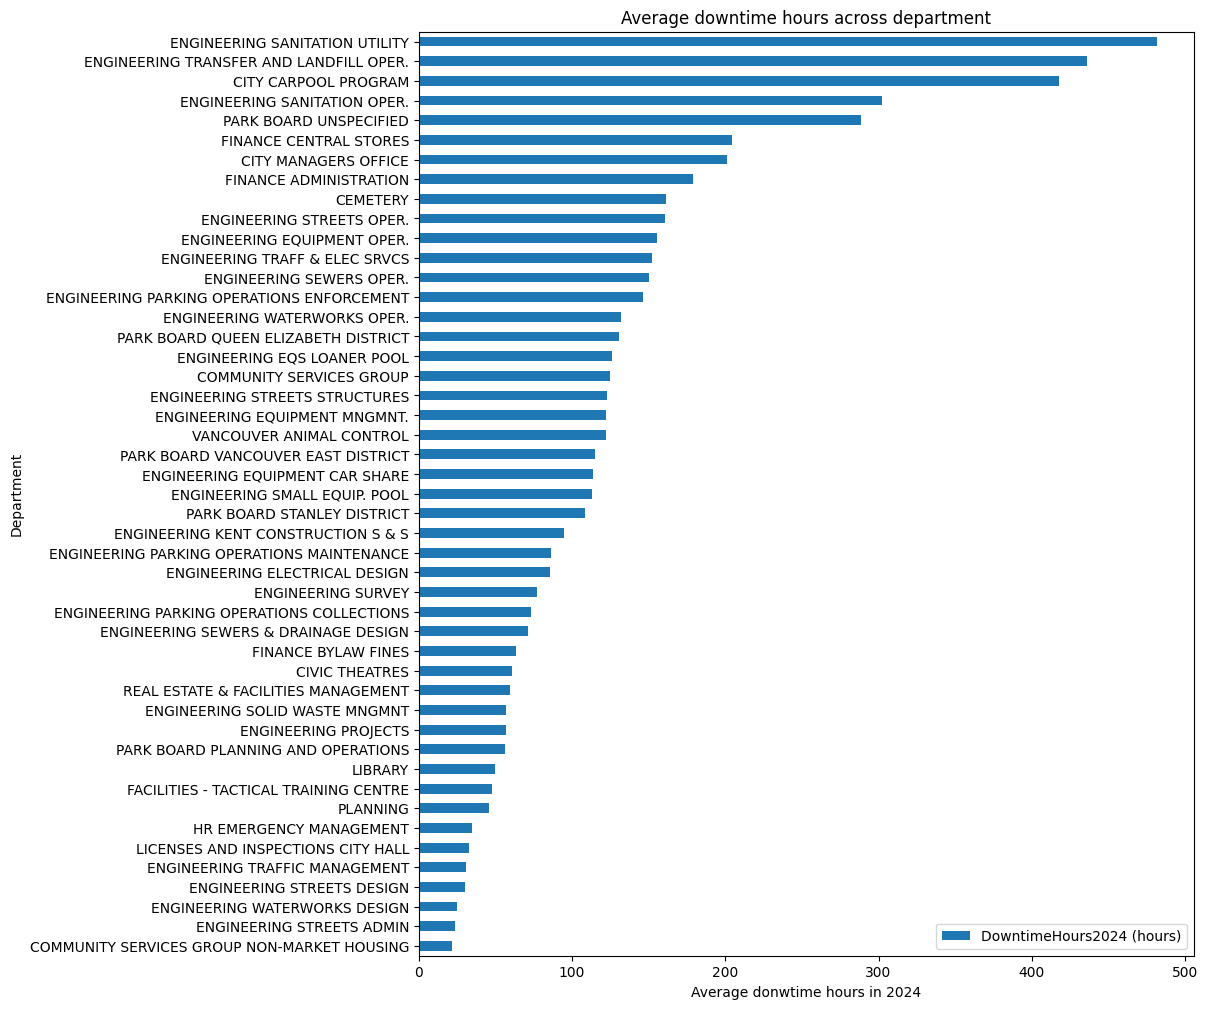

In [ ]:
downtime_by_department = df.groupby("Department").agg({"DowntimeHours2024 (hours)": "median"})

downtime_by_department.sort_values(by="DowntimeHours2024 (hours)", inplace=True)

downtime_by_department.plot(kind="barh", figsize=(10,12))
plt.title("Average downtime hours across department")
plt.xlabel("Average donwtime hours in 2024")
plt.ylabel("Department")
plt.show()

##Equipment laborhours across equipment category

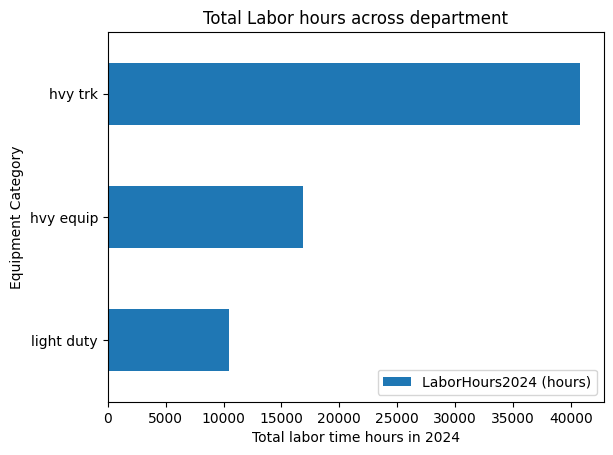

In [ ]:
laborhours_by_EquipmentCategory = df.groupby("Equipment Category").agg({"LaborHours2024 (hours)": "sum"})

laborhours_by_EquipmentCategory.sort_values(by="LaborHours2024 (hours)", inplace=True)

laborhours_by_EquipmentCategory.plot(kind="barh")
plt.title("Total Labor hours across Equipment Category")
plt.xlabel("Total labor time hours in 2024")
plt.ylabel("Equipment Category")
plt.show()

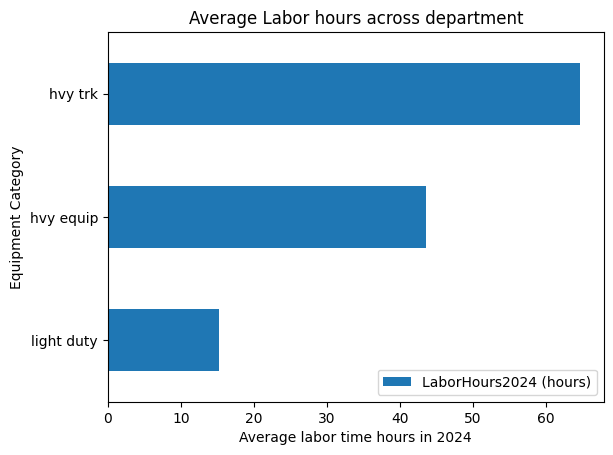

In [ ]:
laborhours_by_EquipmentCategory = df.groupby("Equipment Category").agg({"LaborHours2024 (hours)": "median"})

laborhours_by_EquipmentCategory.sort_values(by="LaborHours2024 (hours)", inplace=True)

laborhours_by_EquipmentCategory.plot(kind="barh")
plt.title("Average Labor hours across Equipment Category")
plt.xlabel("Average labor time hours in 2024")
plt.ylabel("Equipment Category")
plt.show()

#Labor hours across Service Group

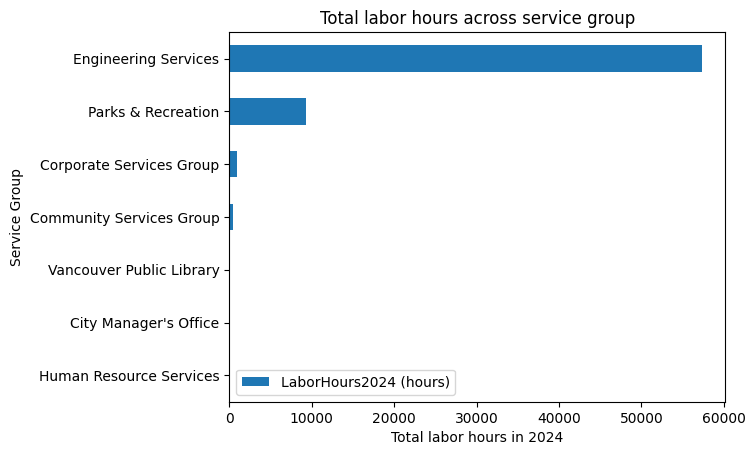

                          LaborHours2024 (hours)
Service Group                                   
Human Resource Services                17.361130
City Manager's Office                  34.273090
Vancouver Public Library              111.479760
Community Services Group              444.498520
Corporate Services Group              984.910890
Parks & Recreation                   9265.490915
Engineering Services                57280.798130


In [ ]:
laborhours_by_serviceGroup = df.groupby("Service Group").agg({"LaborHours2024 (hours)": "sum"})
laborhours_by_serviceGroup.sort_values("LaborHours2024 (hours)", inplace=True)

laborhours_by_serviceGroup.plot(kind="barh")
plt.title("Total labor hours across service group")
plt.xlabel("Total labor hours in 2024")
plt.ylabel("Service Group")
plt.show()

print(laborhours_by_serviceGroup)

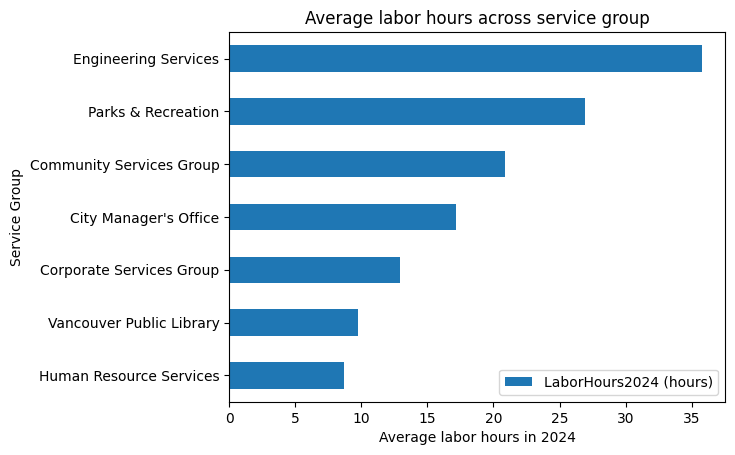

                          LaborHours2024 (hours)
Service Group                                   
Human Resource Services                 8.680565
Vancouver Public Library                9.785000
Corporate Services Group               12.955830
City Manager's Office                  17.136545
Community Services Group               20.883030
Parks & Recreation                     26.954175
Engineering Services                   35.741120


In [ ]:
laborhours_by_serviceGroup = df.groupby("Service Group").agg({"LaborHours2024 (hours)": "median"})
laborhours_by_serviceGroup.sort_values("LaborHours2024 (hours)", inplace=True)

laborhours_by_serviceGroup.plot(kind="barh")
plt.title("Average labor hours across service group")
plt.xlabel("Average labor hours in 2024")
plt.ylabel("Service Group")
plt.show()

print(laborhours_by_serviceGroup)

In [ ]:
df.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage
1,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage
2,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage
3,A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage
4,A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage


#Labour hours across department

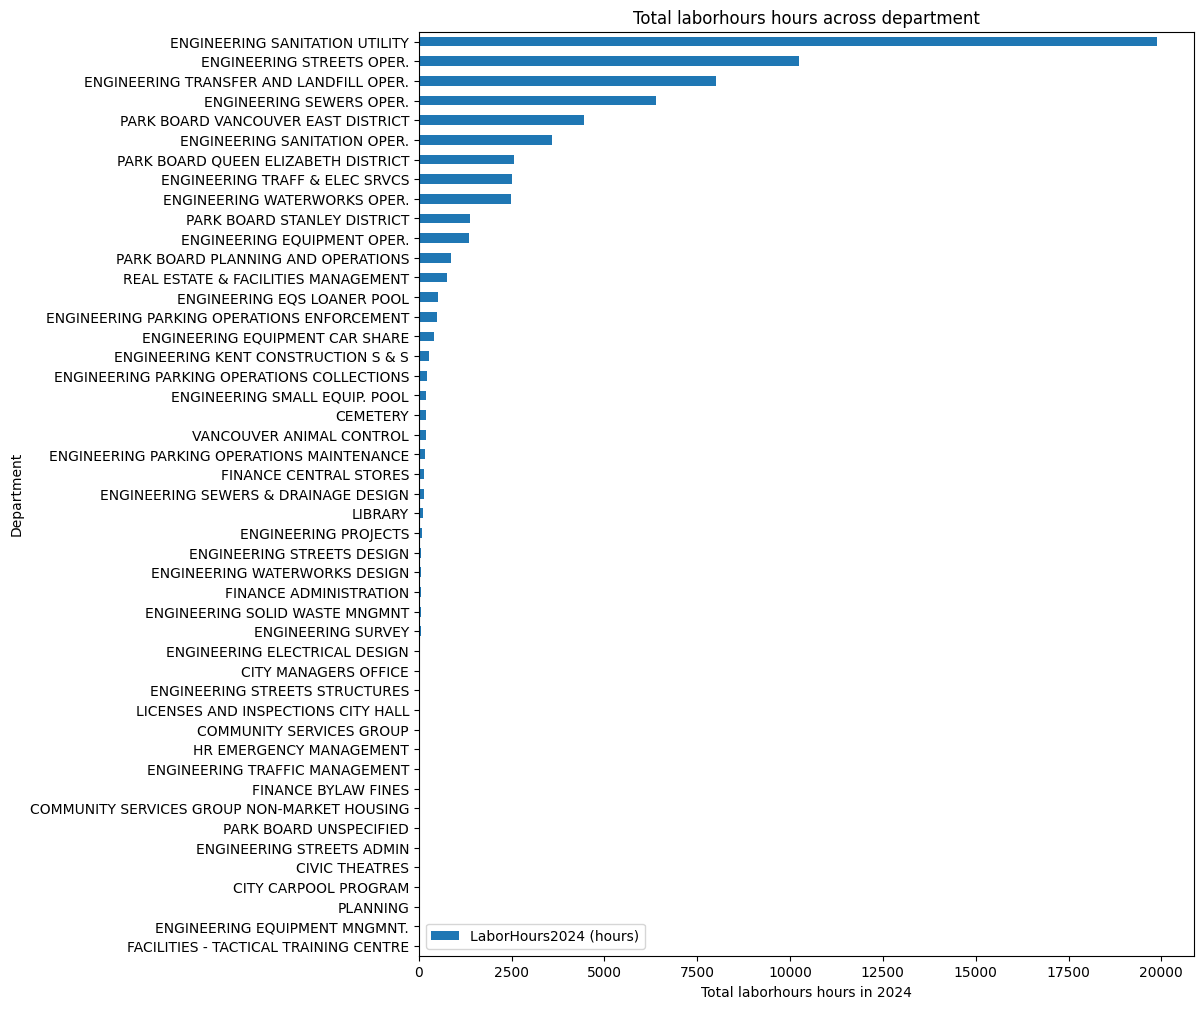

In [ ]:
laborhours_by_department = df.groupby("Department").agg({"LaborHours2024 (hours)": "sum"})

laborhours_by_department.sort_values(by="LaborHours2024 (hours)", inplace=True)

laborhours_by_department.plot(kind="barh", figsize=(10,12))
plt.title("Total laborhours hours across department")
plt.xlabel("Total laborhours hours in 2024")
plt.ylabel("Department")
plt.show()

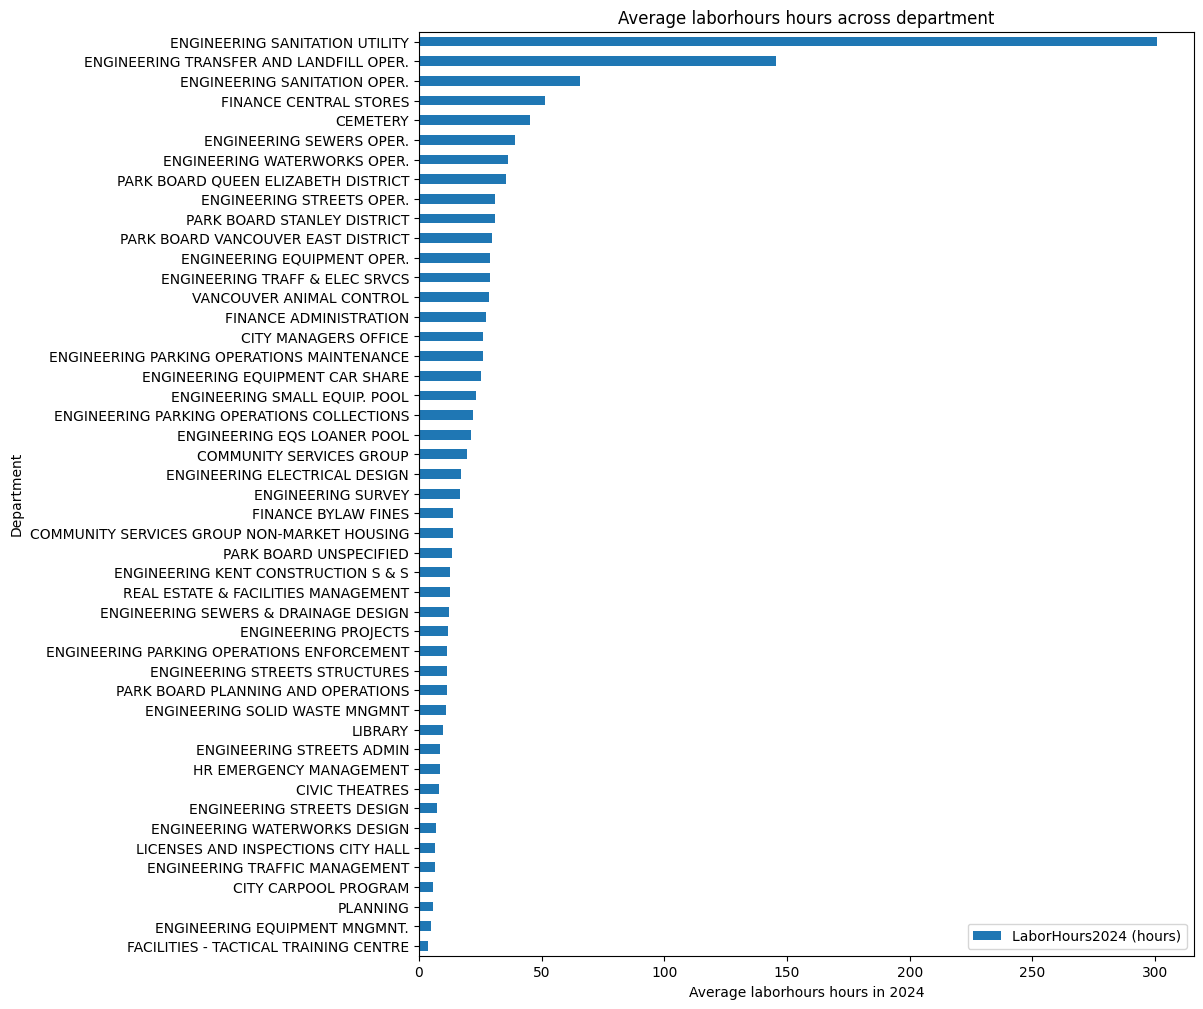

In [ ]:
laborhours_by_department = df.groupby("Department").agg({"LaborHours2024 (hours)": "median"})

laborhours_by_department.sort_values(by="LaborHours2024 (hours)", inplace=True)

laborhours_by_department.plot(kind="barh", figsize=(10,12))
plt.title("Average laborhours hours across department")
plt.xlabel("Average laborhours hours in 2024")
plt.ylabel("Department")
plt.show()

#One important thing to note is that the downtime and labor hours context depend on the category. Whether the fleet has high or low downtime depends on which category it belongs to. For instance, 500 hours downtime may be low for heavy truck but it may be huge for light duty. Therefore, in order to find the check fleets inefficiency interms of downtime and labor hours, we need analyze the inefficiency seperately.

## Lets analyze efficiency

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           1091 non-null   object 
 1   Equipment Class            1091 non-null   object 
 2   Equipment Category         1091 non-null   object 
 3   Service Group              1091 non-null   object 
 4   Department                 1091 non-null   object 
 5   Make                       1091 non-null   object 
 6   Model                      1091 non-null   object 
 7   Year                       1091 non-null   int64  
 8   Site                       1091 non-null   object 
 9   Mileage2024 (km)           833 non-null    float64
 10  HourMeter2024 (hours)      332 non-null    float64
 11  DowntimeHours2024 (hours)  1091 non-null   float64
 12  LaborHours2024 (hours)     1091 non-null   float64
 13  PrimaryMetric              1091 non-null   objec

In [ ]:
df["Equipment Category"].unique()

array(['light duty', 'hvy trk', 'hvy equip'], dtype=object)

##We can see a model year column. So, we can calculate the age of the fleet.

#Feature Engineering

In [ ]:
from datetime import datetime

current_year = datetime.today().year
df["Age"] = current_year - df['Year']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           1091 non-null   object 
 1   Equipment Class            1091 non-null   object 
 2   Equipment Category         1091 non-null   object 
 3   Service Group              1091 non-null   object 
 4   Department                 1091 non-null   object 
 5   Make                       1091 non-null   object 
 6   Model                      1091 non-null   object 
 7   Year                       1091 non-null   int64  
 8   Site                       1091 non-null   object 
 9   Mileage2024 (km)           833 non-null    float64
 10  HourMeter2024 (hours)      332 non-null    float64
 11  DowntimeHours2024 (hours)  1091 non-null   float64
 12  LaborHours2024 (hours)     1091 non-null   float64
 13  PrimaryMetric              1091 non-null   objec

In [ ]:
df.to_csv("CleanedDataSet.csv")
files.download("CleanedDataSet.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Business Q3:	Are there any additional data-driven insights or trends that could impact operational performance, efficiency, or decision-making?

In [ ]:
category_dfs = []

categories = df['Equipment Category'].unique()

for category in categories:
  category_records = df[df['Equipment Category'] == category]
  category_dfs.append(category_records)

In [ ]:
category_dfs[2]["Equipment Category"].unique()

array(['hvy equip'], dtype=object)

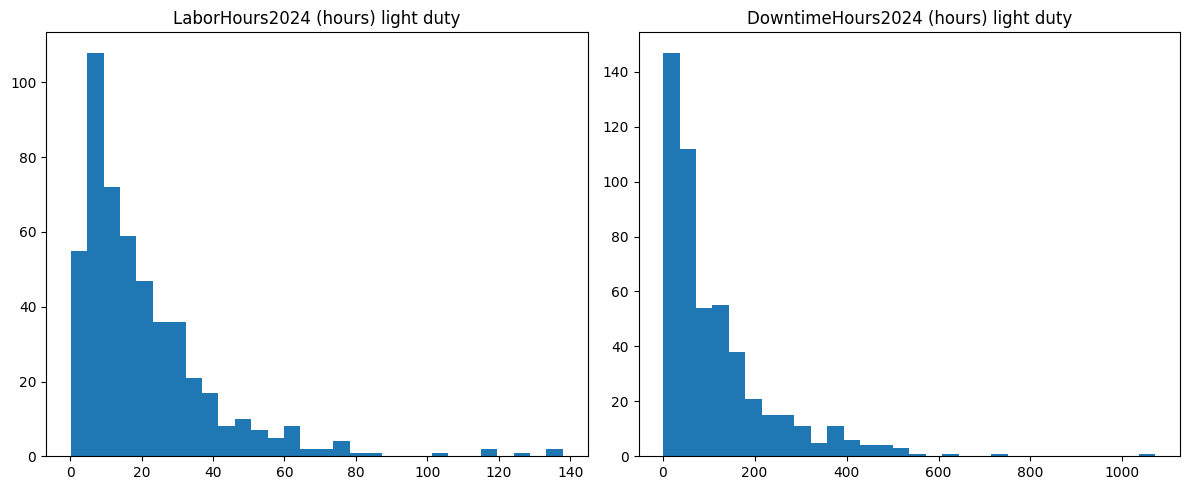

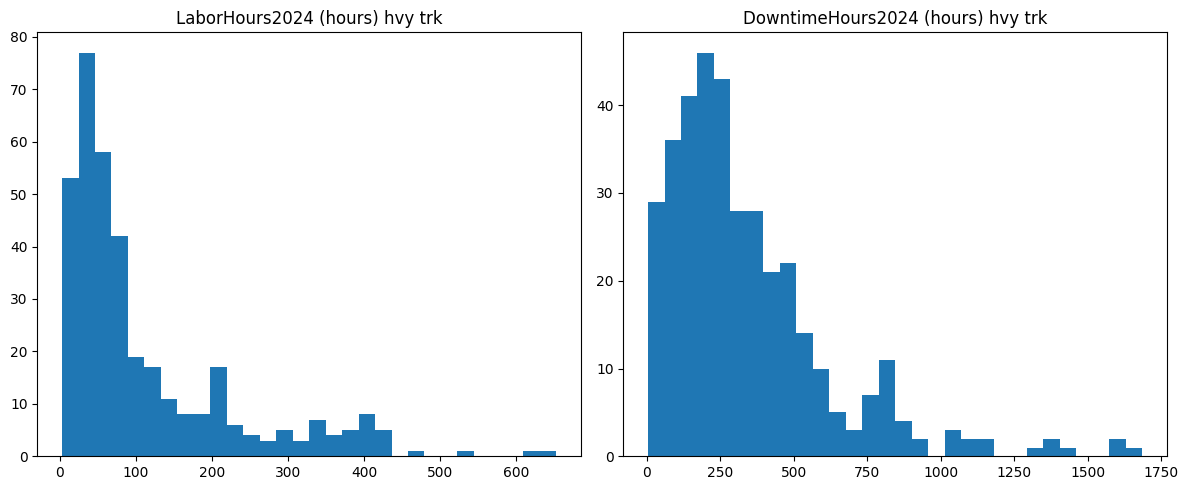

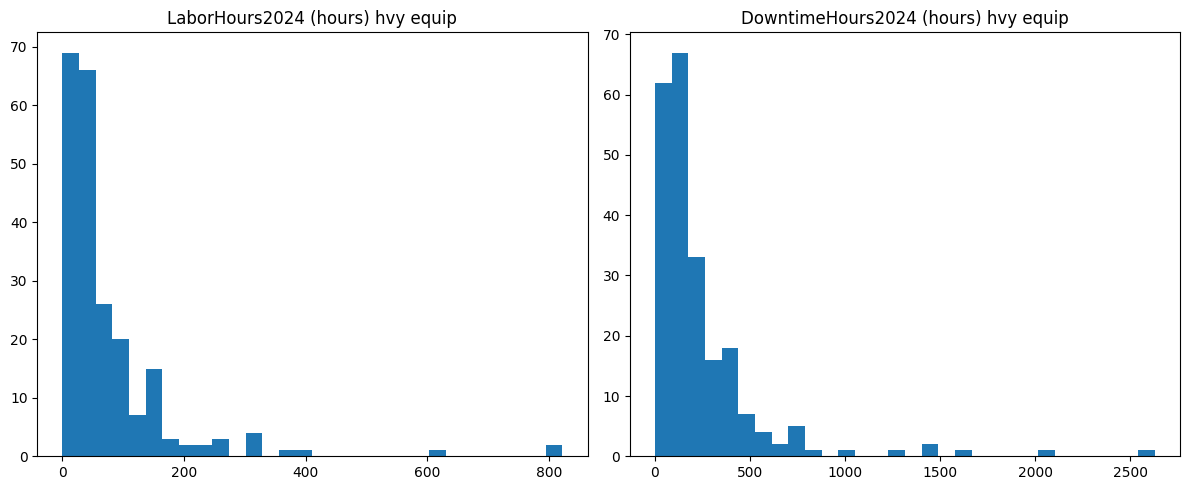

In [ ]:
i = 0
for category in category_dfs:
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  axes[0].hist(category["LaborHours2024 (hours)"], bins = 30)
  axes[0].set_title(f"LaborHours2024 (hours) {categories[i]}")

  axes[1].hist(category["DowntimeHours2024 (hours)"], bins = 30)
  axes[1].set_title(f"DowntimeHours2024 (hours) {categories[i]}")

  i += 1

  plt.tight_layout()
  plt.show()

#Insights 1: Extreme inefficent fleets

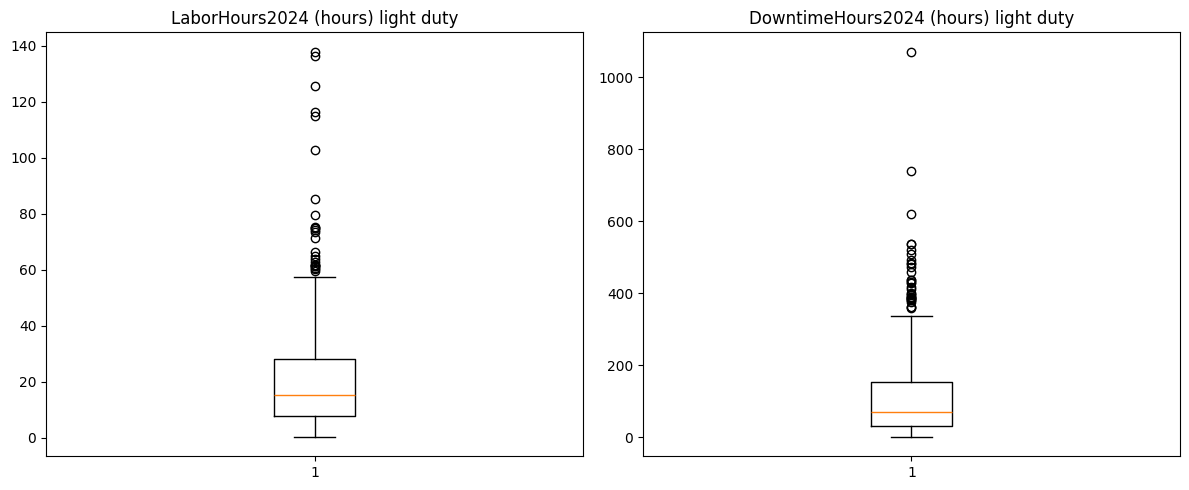

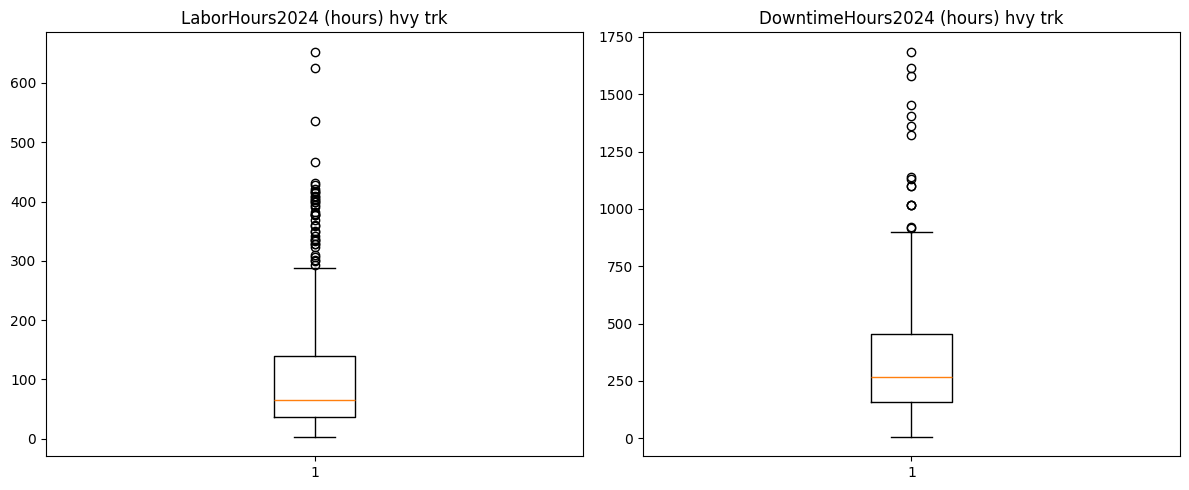

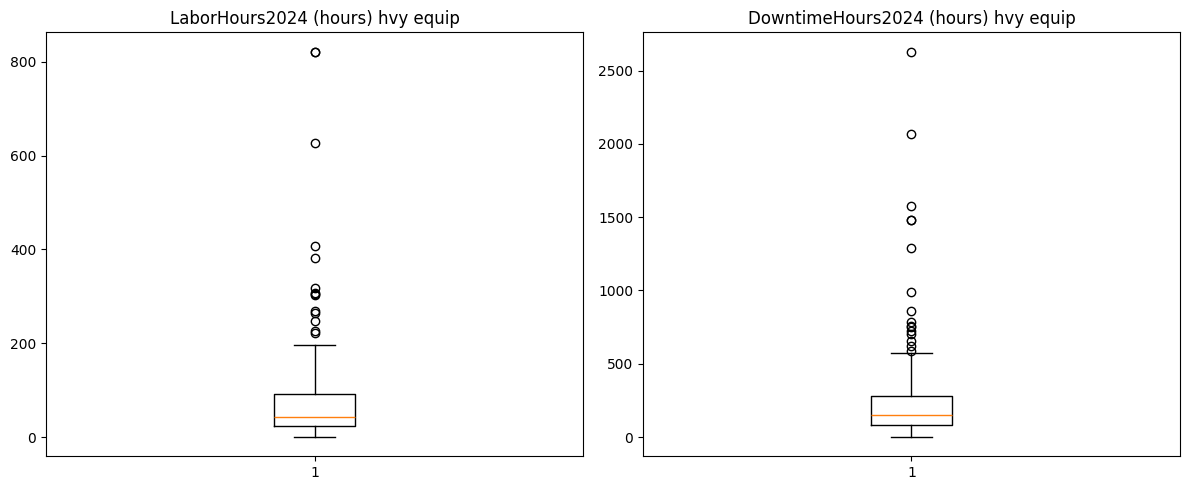

In [ ]:
i = 0
for category in category_dfs:
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  axes[0].boxplot(category["LaborHours2024 (hours)"])
  axes[0].set_title(f"LaborHours2024 (hours) {categories[i]}")

  axes[1].boxplot(category["DowntimeHours2024 (hours)"])
  axes[1].set_title(f"DowntimeHours2024 (hours) {categories[i]}")

  i += 1

  plt.tight_layout()
  plt.show()

In [ ]:
inefficient_by_category = []

for category_df in category_dfs:
  category_records = category_df.copy()

  inefficient_df = pd.DataFrame()

  for col in ["LaborHours2024 (hours)", "DowntimeHours2024 (hours)"]:
    Q1 = category_records[col].quantile(0.25)
    Q3 = category_records[col].quantile(0.75)

    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    inefficient_fleets = category_records[category_records[col] > upper_bound]
    inefficient_df = pd.concat([inefficient_df, inefficient_fleets])

  inefficient_df.drop_duplicates(inplace=True)

  inefficient_by_category.append(inefficient_df)

In [ ]:
inefficient_by_category[0].sort_values(by=["LaborHours2024 (hours)"], ascending = False)

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
664,B1934,"VAN, 1TON, CUBE BODY",light duty,Engineering Services,ENGINEERING EQUIPMENT OPER.,FORD,E350,2006,MANITOBA YD. (250 W. 70TH),2666.0,NaN,385.099443,137.94252,mileage,19
694,C1371,"VAN, 1.5TON, CUBE BODY",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,E450,2004,MANITOBA YD. (250 W. 70TH),20985.0,NaN,509.321388,136.23307,mileage,21
733,C1842,"TRUCK, REFUSE, LITTER PICKUP",light duty,Engineering Services,ENGINEERING SANITATION OPER.,FORD,RANGER,2009,MANITOBA YD. (250 W. 70TH),8640.0,NaN,380.519718,125.79001,mileage,16
772,D1535,"VAN, 1.5TON, CUBE BODY",light duty,Engineering Services,ENGINEERING SANITATION OPER.,FORD,E450,2005,MANITOBA YD. (250 W. 70TH),15831.0,NaN,1071.692763,116.18556,mileage,20
539,D7631,"VAN, PANEL, LIGHT",light duty,Parks & Recreation,PARK BOARD STANLEY DISTRICT,FORD,E150,2006,STANLEY PARK SERVICE YD.,22014.0,NaN,359.661114,115.04028,mileage,19
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage,22
740,C1850,"TRUCK, REFUSE, LITTER PICKUP",light duty,Engineering Services,ENGINEERING SANITATION OPER.,FORD,RANGER,2009,MANITOBA YD. (250 W. 70TH),36679.0,NaN,484.895835,85.19419,mileage,16
417,C7691,"VAN, PANEL, HEAVY",light duty,Corporate Services Group,REAL ESTATE & FACILITIES MANAGEMENT,FORD,E350,2002,EVANS YARD (955 EVANS AVE.),5266.0,NaN,280.687500,79.70861,mileage,23
741,C1851,"TRUCK, REFUSE, LITTER PICKUP",light duty,Engineering Services,ENGINEERING SANITATION OPER.,FORD,RANGER,2009,MANITOBA YD. (250 W. 70TH),24465.0,NaN,492.748893,75.20801,mileage,16
589,D1414,"TRUCK, PICKUP, COMPACT, FOUR WHEEL DRIVE",light duty,Engineering Services,ENGINEERING TRANSFER AND LANDFILL OPER.,FORD,RANGER,2011,DELTA LANDFILL,3405.0,NaN,192.956113,74.99828,mileage,14


In [ ]:
inefficient_by_category[0]["Department"].value_counts()

,count
Department,
ENGINEERING SANITATION OPER.,12
ENGINEERING PARKING OPERATIONS ENFORCEMENT,7
ENGINEERING SEWERS OPER.,5
ENGINEERING TRANSFER AND LANDFILL OPER.,3
ENGINEERING EQUIPMENT OPER.,3
ENGINEERING EQUIPMENT CAR SHARE,2
ENGINEERING EQS LOANER POOL,2
REAL ESTATE & FACILITIES MANAGEMENT,2
ENGINEERING TRAFF & ELEC SRVCS,2


In [ ]:
inefficient_by_category[1]["Department"].value_counts()

,count
Department,
ENGINEERING SANITATION UTILITY,37
ENGINEERING TRANSFER AND LANDFILL OPER.,10
ENGINEERING SEWERS OPER.,2
ENGINEERING TRAFF & ELEC SRVCS,2
ENGINEERING SANITATION OPER.,2
ENGINEERING EQUIPMENT OPER.,1


In [ ]:
inefficient_by_category[2]["Department"].value_counts()

,count
Department,
ENGINEERING TRANSFER AND LANDFILL OPER.,8
ENGINEERING STREETS OPER.,6
ENGINEERING SANITATION OPER.,3
ENGINEERING SEWERS OPER.,2
PARK BOARD VANCOUVER EAST DISTRICT,1
PARK BOARD QUEEN ELIZABETH DISTRICT,1


#Findings1: Engineering departments have the most inefficent fleets

#Insights 2: Correlation between Age and Inefficiency
#Lets see if there is any correlation between age and inefficiencies metrics

In [ ]:
category_dfs[0].head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
0,A0006,"VAN, MINI, 7 PASSENGER",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,FORD,WINDSTAR,2003,CROSSROADS (507 W. BROADWAY),6040.0,NaN,740.432781,102.75251,mileage,22
1,A0131,"AUTO, PASSENGER, MICRO COMPACT",light duty,Engineering Services,ENGINEERING EQUIPMENT CAR SHARE,MERCEDES,SMARTC,2008,CROSSROADS (507 W. BROADWAY),3485.0,NaN,412.597220,54.35750,mileage,17
2,A0149,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,FOCUS,2006,NATIONAL YD. (701 NATIONAL),14379.0,NaN,89.826946,15.17277,mileage,19
3,A0152,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,FOCUS,2008,NATIONAL YD. (701 NATIONAL),11908.0,NaN,8.823056,6.12665,mileage,17
4,A0153,"AUTO, PASSENGER, COMPACT",light duty,Engineering Services,ENGINEERING PROJECTS,FORD,FOCUS,2008,CROSSROADS (507 W. BROADWAY),8114.0,NaN,20.933889,7.35584,mileage,17


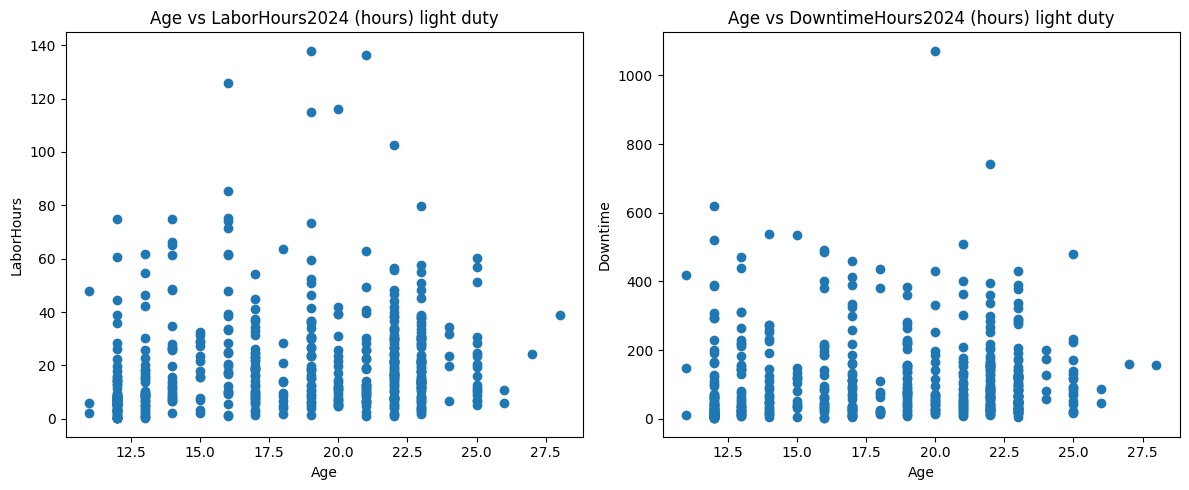

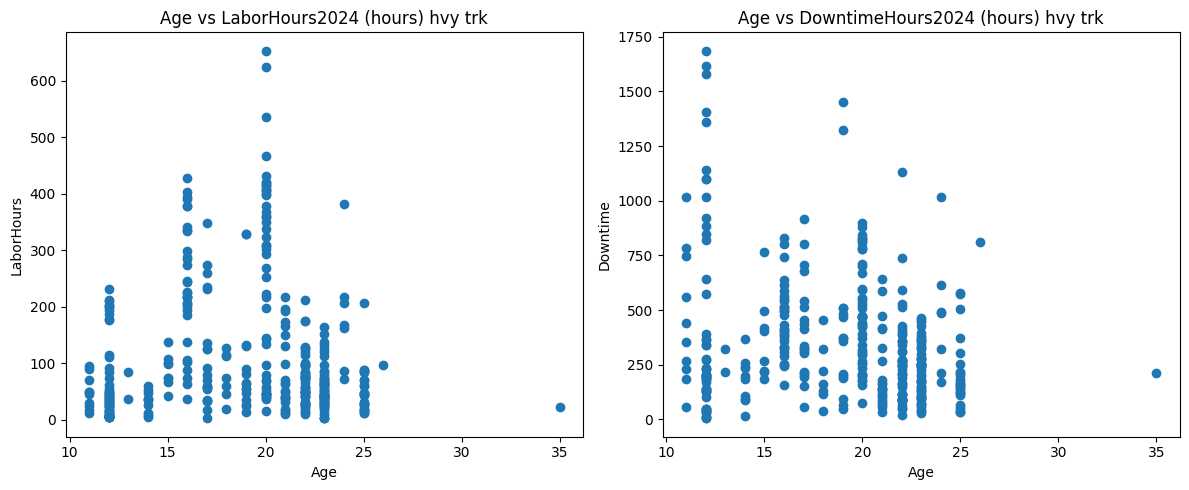

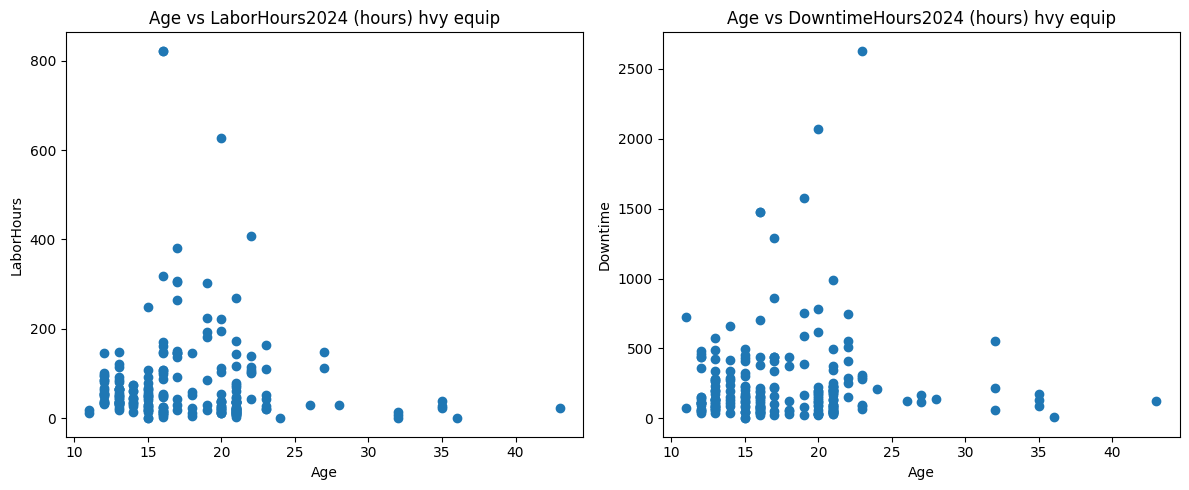

In [ ]:
i = 0
for category in category_dfs:
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  axes[0].scatter(category["Age"], category["LaborHours2024 (hours)"])
  axes[0].set_title(f"Age vs LaborHours2024 (hours) {categories[i]}")
  axes[0].set_xlabel("Age")
  axes[0].set_ylabel("LaborHours")

  axes[1].scatter(category["Age"],category["DowntimeHours2024 (hours)"])
  axes[1].set_title(f"Age vs DowntimeHours2024 (hours) {categories[i]}")
  axes[1].set_xlabel("Age")
  axes[1].set_ylabel("Downtime")

  i += 1

  plt.tight_layout()
  plt.show()

#There are no correlation between age and the inefficiency metrics.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipment Number           1091 non-null   object 
 1   Equipment Class            1091 non-null   object 
 2   Equipment Category         1091 non-null   object 
 3   Service Group              1091 non-null   object 
 4   Department                 1091 non-null   object 
 5   Make                       1091 non-null   object 
 6   Model                      1091 non-null   object 
 7   Year                       1091 non-null   int64  
 8   Site                       1091 non-null   object 
 9   Mileage2024 (km)           833 non-null    float64
 10  HourMeter2024 (hours)      332 non-null    float64
 11  DowntimeHours2024 (hours)  1091 non-null   float64
 12  LaborHours2024 (hours)     1091 non-null   float64
 13  PrimaryMetric              1091 non-null   objec

In [ ]:
df.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,1091.000000,833.000000,332.000000,1091.000000,1091.000000,1091.000000
mean,2006.586618,9196.216687,529.775602,218.085861,62.455373,18.413382
std,4.461719,7961.167093,505.348501,254.060884,93.182601,4.461719
min,1982.000000,0.000000,0.000000,0.496111,0.001670,11.000000
25%,2003.000000,4511.000000,125.000000,57.236806,12.956255,14.000000
50%,2006.000000,7444.000000,379.500000,139.713332,30.133880,19.000000
75%,2011.000000,11539.000000,836.500000,284.377358,64.795690,22.000000
max,2014.000000,64500.000000,2990.000000,2629.310007,822.157860,43.000000


#Insights 3: Zero Utilization fleets.


---


#There are some fleets with zero utilization. But it's important to note that fleets have a specific metric type. For instance, light-duty vehicles are measured in mileage. So, even if light duty's hour meter is 0, it will not affect.

#Therefore, lets sperate the records on the basis of metrics and check the utilization.

In [ ]:
df["PrimaryMetric"].unique()

array(['mileage', 'hours'], dtype=object)

In [ ]:
df_mileage = df[df["PrimaryMetric"]=="mileage"]
df_hours = df[df['PrimaryMetric'] != "mileage"]

In [ ]:
df_hours["PrimaryMetric"].unique()

array(['hours'], dtype=object)

#Let's check the mileage first

In [ ]:
df_mileage.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,833.000000,833.000000,74.000000,833.000000,833.000000,833.000000
mean,2006.474190,9196.216687,517.283784,196.093215,47.433455,18.525810
std,4.390179,7961.167093,377.520480,221.884206,64.689755,4.390179
min,1990.000000,0.000000,0.000000,1.249722,0.179720,11.000000
25%,2003.000000,4511.000000,256.250000,48.818889,10.858060,14.000000
50%,2006.000000,7444.000000,488.500000,127.325279,25.736950,19.000000
75%,2011.000000,11539.000000,653.750000,264.036667,52.413590,22.000000
max,2014.000000,64500.000000,1940.000000,1685.859456,427.350240,35.000000


##There are mileage metric fleets, which have zero utilization.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Mileage2024 (km)'}>],
       [<Axes: title={'center': 'HourMeter2024 (hours)'}>,
        <Axes: title={'center': 'DowntimeHours2024 (hours)'}>],
       [<Axes: title={'center': 'LaborHours2024 (hours)'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

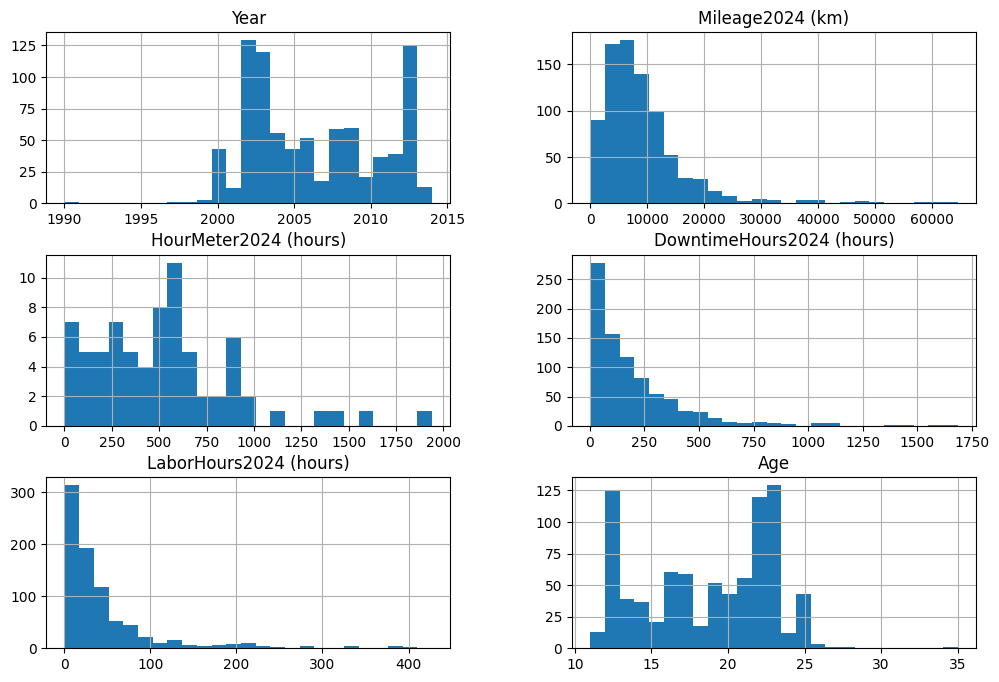

In [ ]:
df_mileage.hist(bins=25, figsize=(12,8))

## We can see multiple fleets that are not utilized.

In [ ]:
df_mileage_Zero_util = df_mileage.loc[df_mileage["Mileage2024 (km)"] == 0].copy()
df_mileage_Zero_util.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
17,A1139,"TRUCK, PICKUP, LIGHT",light duty,Engineering Services,ENGINEERING STREETS OPER.,FORD,F150,2008,MANITOBA YD. (250 W. 70TH),0.0,NaN,28.093333,9.06419,mileage,17
68,A5486,"TRUCK, FLATDECK, LIGHT",hvy trk,Parks & Recreation,PARK BOARD PLANNING AND OPERATIONS,STERLING,360,2008,EVANS YARD (955 EVANS AVE.),0.0,NaN,302.212222,2.88250,mileage,17
221,C0205,"AUTO, PASSENGER, SUB-COMPACT, ELEC",light duty,Engineering Services,ENGINEERING WATERWORKS OPER.,MITSUBISHI,I MIEV,2012,MANITOBA YD. (250 W. 70TH),0.0,NaN,20.162500,0.41917,mileage,13
272,C1112,"TRUCK, PICKUP, LIGHT, HYBRID ELEC",light duty,Engineering Services,ENGINEERING STREETS OPER.,GENERAL MOTORS,SILVERADO,2012,NATIONAL YD. (701 NATIONAL),0.0,NaN,14.483055,8.85082,mileage,13
388,C7516,"TRUCK, PICKUP, COMPACT",light duty,Corporate Services Group,REAL ESTATE & FACILITIES MANAGEMENT,FORD,RANGER,2004,EVANS YARD (955 EVANS AVE.),0.0,NaN,35.085278,10.23528,mileage,21


In [ ]:
df_mileage_Zero_util['Department'].value_counts()

,count
Department,
PARK BOARD QUEEN ELIZABETH DISTRICT,4
ENGINEERING STREETS OPER.,2
PARK BOARD PLANNING AND OPERATIONS,1
ENGINEERING WATERWORKS OPER.,1
REAL ESTATE & FACILITIES MANAGEMENT,1
PARK BOARD VANCOUVER EAST DISTRICT,1
ENGINEERING SEWERS OPER.,1


## Unutilized fleets belong to these departments.

In [ ]:
df_mileage_Zero_util["Equipment Category"].value_counts()

,count
Equipment Category,
light duty,7
hvy trk,4


In [ ]:
df_mileage_Zero_util.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,11.000000,11.0,1.0,11.000000,11.000000,11.000000
mean,2007.727273,0.0,0.0,70.437954,9.210305,17.272727
std,5.236237,0.0,NaN,88.765807,7.025313,5.236237
min,1998.000000,0.0,0.0,1.249722,0.315830,12.000000
25%,2005.000000,0.0,0.0,21.746528,4.798195,13.000000
50%,2008.000000,0.0,0.0,35.085278,9.064190,17.000000
75%,2012.000000,0.0,0.0,71.518333,11.725840,20.000000
max,2013.000000,0.0,0.0,302.212222,24.377210,27.000000


#Insights 4: Underutilized Fleets

##Now lets see fleets with below 5th percentile utilization.

## But fleets have two category. So, utilization may be different for each category.

In [ ]:
df_mileage["Equipment Category"].unique()

array(['light duty', 'hvy trk'], dtype=object)

In [ ]:
df_mileage_light = df_mileage.loc[df['Equipment Category']== "light duty"].copy()

In [ ]:
threshold_light = df_mileage_light["Mileage2024 (km)"].quantile(0.05)
df_mileage_light_underUtil = df_mileage_light[(df['Mileage2024 (km)'] <= threshold_light) & (df['Mileage2024 (km)'] != 0)].copy()
df_mileage_light_underUtil.head()

/tmp/ipython-input-51-1745390291.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mileage_light_underUtil = df_mileage_light[(df['Mileage2024 (km)'] <= threshold_light) & (df['Mileage2024 (km)'] != 0)].copy()


,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
13,A0492,"VAN, MINI, 7 PASSENGER",light duty,Community Services Group,PLANNING,FORD,WINDSTAR,1999,CAMBIE ST PARKADE,373.0,NaN,45.599722,5.86945,mileage,26
62,A5213,"VAN, PASSENGER, 10+ PASSENGER",light duty,Parks & Recreation,PARK BOARD UNSPECIFIED,FORD,ECONOLINE,2002,FALSE CREEK CC (1318 CARTWRIGHT),219.0,NaN,288.844722,13.64028,mileage,23
108,B0210,"AUTO, PASSENGER, SUB-COMPACT, ELEC",light duty,Engineering Services,ENGINEERING WATERWORKS OPER.,MITSUBISHI,I MIEV,2012,MANITOBA YD. (250 W. 70TH),19.0,NaN,58.743056,5.05445,mileage,13
173,B1795,"VAN, PANEL, COMPACT",light duty,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,WINDSTAR,2002,NATIONAL YD. (701 NATIONAL),1014.0,NaN,44.475832,6.63749,mileage,23
220,C0185,"AUTO, PASSENGER, COMPACT WAGON",light duty,Engineering Services,ENGINEERING STREETS STRUCTURES,FORD,FOCUS,2004,CROSSROADS (507 W. BROADWAY),685.0,NaN,124.933891,8.75221,mileage,21


In [ ]:
df_mileage_light_underUtil.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,19.000000,19.000000,0.0,19.000000,19.000000,19.000000
mean,2006.263158,408.526316,NaN,129.917558,12.322352,18.736842
std,4.318463,339.143262,NaN,128.394095,8.488325,4.318463
min,1999.000000,5.000000,NaN,12.649166,2.237220,12.000000
25%,2003.500000,128.500000,NaN,35.756527,6.177785,15.000000
50%,2005.000000,364.000000,NaN,66.463888,9.378340,20.000000
75%,2010.000000,700.500000,NaN,208.349723,15.560135,21.500000
max,2013.000000,1014.000000,NaN,389.363335,34.263060,26.000000


In [ ]:
df_mileage_light_underUtil['Department'].value_counts()

,count
Department,
PARK BOARD VANCOUVER EAST DISTRICT,3
ENGINEERING PARKING OPERATIONS ENFORCEMENT,3
ENGINEERING TRAFF & ELEC SRVCS,2
ENGINEERING WATERWORKS OPER.,2
ENGINEERING SANITATION OPER.,2
PARK BOARD UNSPECIFIED,1
PLANNING,1
ENGINEERING STREETS STRUCTURES,1
ENGINEERING STREETS DESIGN,1


In [ ]:
df_mileage_heavyTrk = df_mileage[df_mileage["Equipment Category"] == "hvy trk"].copy()
threshold_heavyTrk = df_mileage_heavyTrk["Mileage2024 (km)"].quantile(0.05)

df_mileage_heavyTrk_underUtil = df_mileage_heavyTrk[(df_mileage_heavyTrk['Mileage2024 (km)'] <= threshold_heavyTrk) & (df_mileage_heavyTrk['Mileage2024 (km)'] != 0)].copy()
df_mileage_heavyTrk_underUtil.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
47,A1704,"TRUCK, AERIAL, 40 FT BOOM",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FORD,F550,2003,NATIONAL YD. (701 NATIONAL),768.0,NaN,47.524722,14.08613,mileage,22
59,A2246,"TRUCK, DUMP, TANDEM AXLE",hvy trk,Engineering Services,ENGINEERING KENT CONSTRUCTION S & S,STERLING,LT7501,2003,KENT YARD (900 E. KENT),697.0,NaN,83.380277,30.60919,mileage,22
167,B1744,"TRUCK, AERIAL, LINE",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,INTERNATIONAL,4600,1990,NATIONAL YD. (701 NATIONAL),300.0,NaN,211.622500,22.92915,mileage,35
282,C1135,"TRUCK, CLASS 4, CREW CAB, DUMP BODY, SNOW EQUI...",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2013,NATIONAL YD. (701 NATIONAL),1398.0,121.0,11.664722,5.34028,mileage,12
318,C1289,"TRUCK, CLASS 4, CREW CAB, DUMP BODY, SNOW EQUI...",hvy trk,Engineering Services,ENGINEERING STREETS OPER.,FORD,F450,2013,NATIONAL YD. (701 NATIONAL),35.0,0.0,4.965278,4.91389,mileage,12


In [ ]:
df_mileage_heavyTrk_underUtil.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,13.000000,13.000000,5.00000,13.000000,13.000000,13.000000
mean,2006.923077,866.615385,62.40000,250.083547,37.930537,18.076923
std,6.861262,510.126380,51.81988,289.314873,58.055357,6.861262
min,1990.000000,35.000000,0.00000,4.965278,3.949170,12.000000
25%,2003.000000,624.000000,16.00000,28.734444,5.709450,12.000000
50%,2009.000000,792.000000,87.00000,131.358610,22.929150,16.000000
75%,2013.000000,1344.000000,88.00000,455.069724,30.609190,22.000000
max,2013.000000,1490.000000,121.00000,831.753335,217.814190,35.000000


In [ ]:
df_mileage_heavyTrk_underUtil["Department"].value_counts()

,count
Department,
ENGINEERING TRAFF & ELEC SRVCS,5
ENGINEERING STREETS OPER.,3
ENGINEERING KENT CONSTRUCTION S & S,1
PARK BOARD PLANNING AND OPERATIONS,1
PARK BOARD VANCOUVER EAST DISTRICT,1
ENGINEERING EQUIPMENT OPER.,1
ENGINEERING SEWERS OPER.,1


#Now Lets check for hoursmeter

In [ ]:
df_hours.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,258.000000,0.0,258.000000,258.000000,258.000000,258.000000
mean,2006.949612,NaN,533.358527,289.093127,110.956374,18.050388
std,4.675603,NaN,537.000163,328.247830,142.078297,4.675603
min,1982.000000,NaN,0.000000,0.496111,0.001670,11.000000
25%,2005.000000,NaN,74.000000,90.591459,25.231322,15.000000
50%,2007.000000,NaN,343.000000,175.074999,51.676520,18.000000
75%,2010.000000,NaN,904.500000,413.397568,137.013175,20.000000
max,2014.000000,NaN,2990.000000,2629.310007,822.157860,43.000000


##There are fleets (measured in hoursmeter) with zero utilization.

In [ ]:
df_hours_zeroUtil = df_hours[df_hours["HourMeter2024 (hours)"] == 0].copy()
df_hours_zeroUtil.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
833,A0335,"FORKLIFT, LIGHT",hvy equip,Corporate Services Group,FACILITIES - TACTICAL TRAINING CENTRE,TOYOTA,7FBEU18,2009,VPD TRAINING CENTRE (2010 GLEN),NaN,0.0,48.012778,3.58641,hours,16
837,A1900,"KNUCKLE BOOM, ELEC, 30 FT",hvy equip,Engineering Services,ENGINEERING EQUIPMENT OPER.,GENIELIFT,Z-30/20N,2002,MANITOBA YD. (250 W. 70TH),NaN,0.0,68.311388,20.64917,hours,23
841,A2359,"GENERATOR, TRAILER, EMERGENCY, 35 KW",hvy equip,Engineering Services,ENGINEERING SEWERS OPER.,EBI,4U13GENRTR,1990,VARIOUS ON SITE,NaN,0.0,175.353332,23.81723,hours,35
850,B2121,"CONSTRUCTION, ROAD GRADER, 100-125 HP",hvy equip,Engineering Services,ENGINEERING STREETS OPER.,JOHN DEERE,570B,1993,NATIONAL YD. (701 NATIONAL),NaN,0.0,215.241951,1.30472,hours,32
861,B2301,"CLEANER, SEWER BUCKET DRAGGER, TRAILER, LARGE",hvy equip,Engineering Services,ENGINEERING SEWERS OPER.,SRECO,30HP/PI/H/D,2007,MANITOBA YD. (250 W. 70TH),NaN,0.0,59.997780,5.94694,hours,18


In [ ]:
len(df_hours_zeroUtil)

11

In [ ]:
df_hours_zeroUtil["Department"].value_counts()

,count
Department,
ENGINEERING SEWERS OPER.,2
PARK BOARD VANCOUVER EAST DISTRICT,2
PARK BOARD PLANNING AND OPERATIONS,2
PARK BOARD QUEEN ELIZABETH DISTRICT,2
FACILITIES - TACTICAL TRAINING CENTRE,1
ENGINEERING EQUIPMENT OPER.,1
ENGINEERING STREETS OPER.,1


##Now lets see fleets with below 5th percentile utilization.

In [ ]:
df_hours['Equipment Category'].unique()

array(['hvy equip', 'hvy trk'], dtype=object)

##We have to check utilization for each category

In [ ]:
df_hours_HvyEquip = df_hours[df_hours['Equipment Category'] == "hvy equip"].copy()
df_hours_HvyTrk = df_hours[df_hours["Equipment Category"] != "hvy equip"].copy()

In [ ]:
threshold_HE = df_hours_HvyEquip["HourMeter2024 (hours)"].quantile(0.05)
df_hours_HvyEquip_UnderUtil = df_hours_HvyEquip[df_hours_HvyEquip["HourMeter2024 (hours)"] <= threshold_HE].copy()
len(df_hours_HvyEquip_UnderUtil)

13

In [ ]:
df_hours_HvyEquip_UnderUtil["Department"].value_counts()

,count
Department,
PARK BOARD VANCOUVER EAST DISTRICT,3
ENGINEERING STREETS OPER.,2
ENGINEERING SEWERS OPER.,2
PARK BOARD PLANNING AND OPERATIONS,2
PARK BOARD QUEEN ELIZABETH DISTRICT,2
ENGINEERING EQUIPMENT OPER.,1
FACILITIES - TACTICAL TRAINING CENTRE,1


In [ ]:
threshold_HT = df_hours_HvyTrk['HourMeter2024 (hours)'].quantile(0.05)
df_hours_HvyTruck_UnderUtil = df_hours_HvyTrk[df_hours_HvyTrk["HourMeter2024 (hours)"] < threshold_HT].copy()
len(df_hours_HvyTruck_UnderUtil)

2

In [ ]:
df_hours_HvyTruck_UnderUtil

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
897,C1718,"TRUCK, AERIAL, 40 FT BOOM",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FREIGHTLINER,FS-65,2006,NATIONAL YD. (701 NATIONAL),NaN,298.0,370.074163,26.86611,hours,19
898,C1719,"TRUCK, AERIAL, 40 FT BOOM",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,FREIGHTLINER,FS-65,2006,NATIONAL YD. (701 NATIONAL),NaN,201.0,1321.720009,66.15751,hours,19


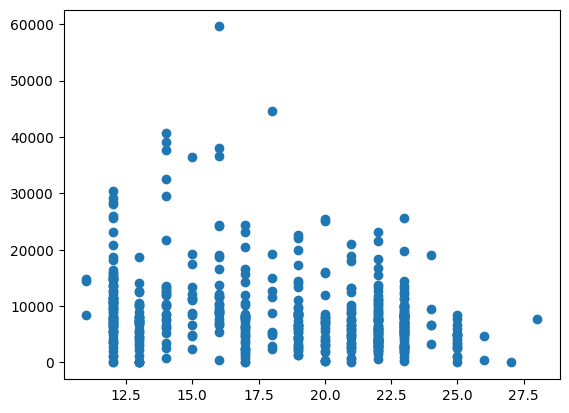

In [ ]:
plt.scatter(df_mileage_light['Age'], df_mileage_light['Mileage2024 (km)'])

In [ ]:
df_mileage_light['Age'].corr(df_mileage_light['Mileage2024 (km)'])

np.float64(-0.25121766253865485)

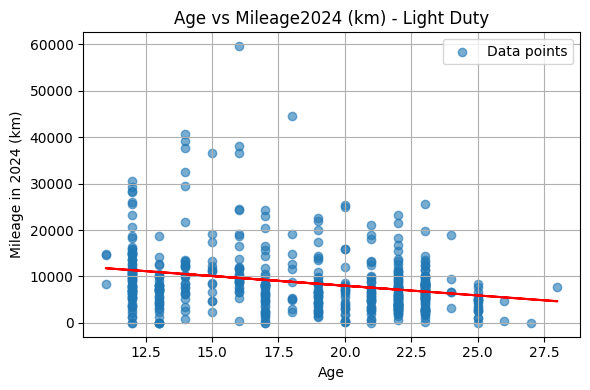

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = df_mileage_light['Age']
y = df_mileage_light['Mileage2024 (km)']

slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept


plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.6, label='Data points')
plt.plot(x, regression_line, color='red')
plt.title('Age vs Mileage2024 (km) - Light Duty')
plt.xlabel('Age')
plt.ylabel('Mileage in 2024 (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


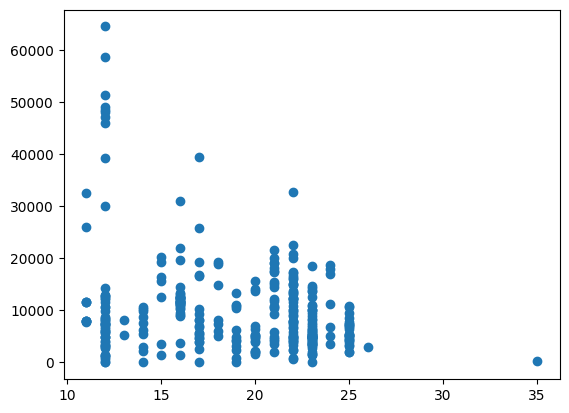

In [ ]:
plt.scatter(df_mileage_heavyTrk['Age'], df_mileage_heavyTrk['Mileage2024 (km)'])

#No correlation between age and utilization

#Here we can see one fleet with extreme age with low or zero utilization. lets analyze it.

In [ ]:
df_mileage_heavyTrk[df_mileage_heavyTrk['Age'] >= 30]

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
167,B1744,"TRUCK, AERIAL, LINE",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,INTERNATIONAL,4600,1990,NATIONAL YD. (701 NATIONAL),300.0,NaN,211.6225,22.92915,mileage,35


In [ ]:
df_mileage_heavyTrk_underUtil[(df_mileage_heavyTrk_underUtil["Equipment Number"] == "B1744")]

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
167,B1744,"TRUCK, AERIAL, LINE",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,INTERNATIONAL,4600,1990,NATIONAL YD. (701 NATIONAL),300.0,NaN,211.6225,22.92915,mileage,35


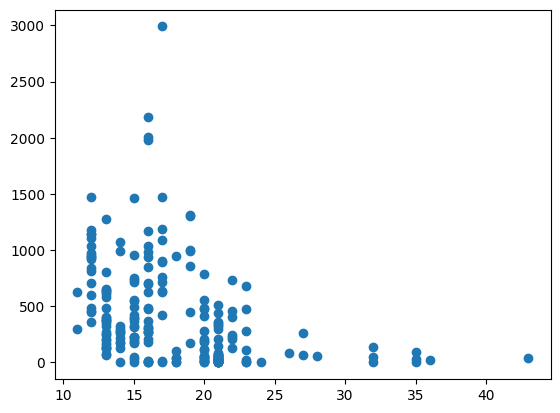

In [ ]:
plt.scatter(df_hours_HvyEquip['Age'], df_hours_HvyEquip['HourMeter2024 (hours)'])

In [ ]:
df_hours_HvyEquip[df_hours_HvyEquip['Age']> 40]

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
845,A2509,"CONSTRUCTION, HYDRAULIC MOBILE CRANE, 12-20T",hvy equip,Engineering Services,ENGINEERING EQUIPMENT OPER.,GALION,150F,1982,MANITOBA YD. (250 W. 70TH),NaN,42.0,124.700553,22.61138,hours,43


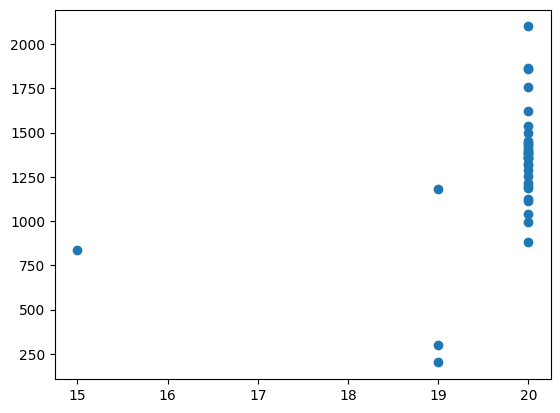

In [ ]:
plt.scatter(df_hours_HvyTrk['Age'], df_hours_HvyTrk['HourMeter2024 (hours)'])

#We can conclude that there are no significant correlation between Age and utilization metrics.

#Insights 5: Older vehicles with low utilization
#lets see the extreme underutlized fleets and extreme age fleets

In [ ]:
mileage_threshold = df_mileage['Mileage2024 (km)'].quantile(0.05)
mileage_age_threshold = df_mileage['Age'].quantile(0.95)

extreme_mileage_underUtil_oldFleets = df_mileage[(df_mileage['Mileage2024 (km)'] < mileage_threshold) & (df_mileage['Age']>mileage_age_threshold)]
extreme_mileage_underUtil_oldFleets

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
13,A0492,"VAN, MINI, 7 PASSENGER",light duty,Community Services Group,PLANNING,FORD,WINDSTAR,1999,CAMBIE ST PARKADE,373.0,NaN,45.599722,5.86945,mileage,26
167,B1744,"TRUCK, AERIAL, LINE",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,INTERNATIONAL,4600,1990,NATIONAL YD. (701 NATIONAL),300.0,NaN,211.622500,22.92915,mileage,35
803,B7312,"VAN, PASSENGER, 10+ PASSENGER",light duty,Parks & Recreation,PARK BOARD QUEEN ELIZABETH DISTRICT,FORD,E350,1998,WEST PT GREY COMMUNITY CENTER (4397 W.2ND),0.0,NaN,159.113334,24.37721,mileage,27


In [ ]:
hours_threshold = df_hours["HourMeter2024 (hours)"].quantile(0.05)
hours_age_threshold = df_hours["Age"].quantile(0.95)

extreme_hours_underUtil_oldFleets = df_hours[(df_hours['HourMeter2024 (hours)'] < hours_threshold) & (df_hours['Age']>hours_age_threshold)]
extreme_hours_underUtil_oldFleets

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
841,A2359,"GENERATOR, TRAILER, EMERGENCY, 35 KW",hvy equip,Engineering Services,ENGINEERING SEWERS OPER.,EBI,4U13GENRTR,1990,VARIOUS ON SITE,NaN,0.0,175.353332,23.81723,hours,35
850,B2121,"CONSTRUCTION, ROAD GRADER, 100-125 HP",hvy equip,Engineering Services,ENGINEERING STREETS OPER.,JOHN DEERE,570B,1993,NATIONAL YD. (701 NATIONAL),NaN,0.0,215.241951,1.30472,hours,32
1011,C7741,"CONSTRUCTION, LOADER, SKID STEER",hvy equip,Parks & Recreation,PARK BOARD QUEEN ELIZABETH DISTRICT,BOBCAT,873G,2001,LANGLEY TREE FRM(20475-16 AVE),NaN,0.0,212.453884,0.00167,hours,24


In [ ]:
df.describe()

,Year,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),Age
count,1091.000000,833.000000,332.000000,1091.000000,1091.000000,1091.000000
mean,2006.586618,9196.216687,529.775602,218.085861,62.455373,18.413382
std,4.461719,7961.167093,505.348501,254.060884,93.182601,4.461719
min,1982.000000,0.000000,0.000000,0.496111,0.001670,11.000000
25%,2003.000000,4511.000000,125.000000,57.236806,12.956255,14.000000
50%,2006.000000,7444.000000,379.500000,139.713332,30.133880,19.000000
75%,2011.000000,11539.000000,836.500000,284.377358,64.795690,22.000000
max,2014.000000,64500.000000,2990.000000,2629.310007,822.157860,43.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Mileage2024 (km)'}>],
       [<Axes: title={'center': 'HourMeter2024 (hours)'}>,
        <Axes: title={'center': 'DowntimeHours2024 (hours)'}>],
       [<Axes: title={'center': 'LaborHours2024 (hours)'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

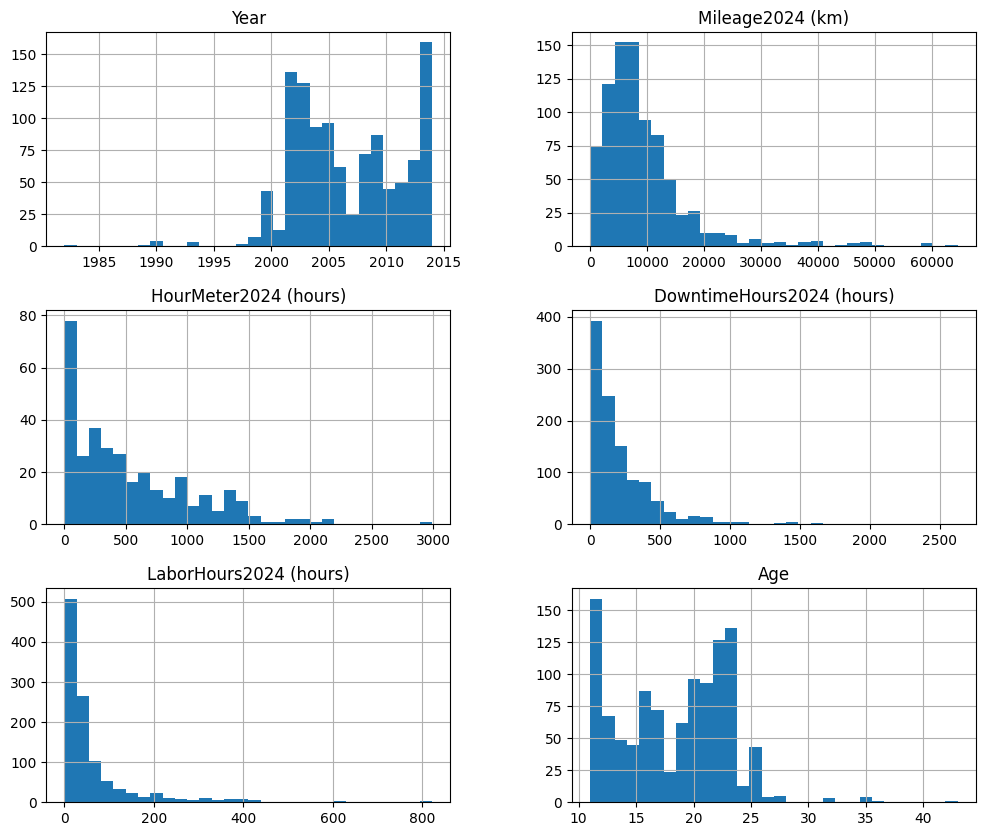

In [ ]:
df.hist(bins=30, figsize=(12,10))

In [ ]:
Extreme_older_fleets = df[df["Age"]> 25].copy()
Extreme_older_fleets.head()

,Equipment Number,Equipment Class,Equipment Category,Service Group,Department,Make,Model,Year,Site,Mileage2024 (km),HourMeter2024 (hours),DowntimeHours2024 (hours),LaborHours2024 (hours),PrimaryMetric,Age
13,A0492,"VAN, MINI, 7 PASSENGER",light duty,Community Services Group,PLANNING,FORD,WINDSTAR,1999,CAMBIE ST PARKADE,373.0,NaN,45.599722,5.86945,mileage,26
40,A1620,"TRUCK, PICKUP, LIGHT",light duty,Engineering Services,ENGINEERING PARKING OPERATIONS MAINTENANCE,FORD,F150,1999,NATIONAL YD. (701 NATIONAL),4758.0,NaN,86.481111,10.97415,mileage,26
167,B1744,"TRUCK, AERIAL, LINE",hvy trk,Engineering Services,ENGINEERING TRAFF & ELEC SRVCS,INTERNATIONAL,4600,1990,NATIONAL YD. (701 NATIONAL),300.0,NaN,211.622500,22.92915,mileage,35
642,B1309,"TRUCK, PICKUP, LIGHT",light duty,Engineering Services,ENGINEERING SEWERS OPER.,FORD,F150,1997,MANITOBA YD. (250 W. 70TH),7638.0,NaN,155.148056,38.83001,mileage,28
655,B1515,"TRUCK, RECYCLING, RIGHT PICKUP",hvy trk,Engineering Services,ENGINEERING SANITATION UTILITY,MACK,MS300P,1999,MANITOBA YD. (250 W. 70TH),2882.0,NaN,812.750277,97.17364,mileage,26


In [ ]:
Extreme_older_fleets["Department"].value_counts()

,count
Department,
ENGINEERING STREETS OPER.,3
ENGINEERING SEWERS OPER.,3
ENGINEERING TRANSFER AND LANDFILL OPER.,2
PARK BOARD VANCOUVER EAST DISTRICT,2
ENGINEERING EQUIPMENT OPER.,2
ENGINEERING TRAFF & ELEC SRVCS,2
ENGINEERING PARKING OPERATIONS MAINTENANCE,1
PLANNING,1
PARK BOARD QUEEN ELIZABETH DISTRICT,1


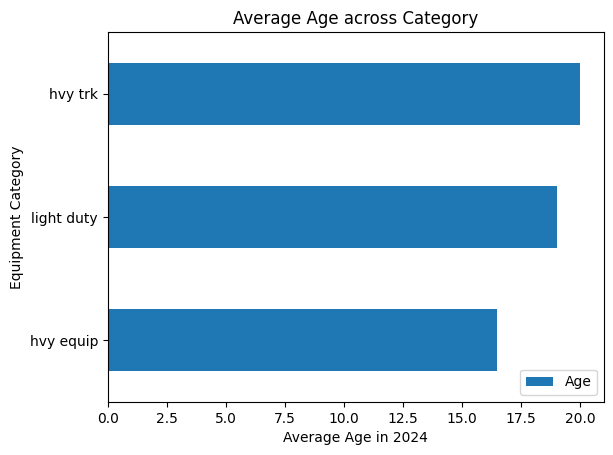

In [ ]:
laborhours_by_EquipmentCategory = df.groupby("Equipment Category").agg({"Age": "median"})

laborhours_by_EquipmentCategory.sort_values(by="Age", inplace=True)

laborhours_by_EquipmentCategory.plot(kind="barh")
plt.title("Average Age across Category")
plt.xlabel("Average Age in 2024")
plt.ylabel("Equipment Category")
plt.show()

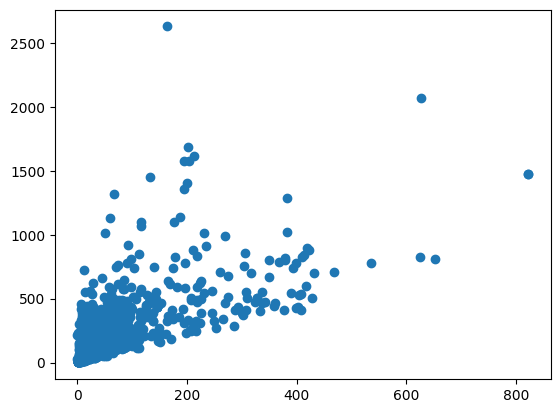

In [ ]:
plt.scatter(df['LaborHours2024 (hours)'],df["DowntimeHours2024 (hours)"])

In [ ]:
df['LaborHours2024 (hours)'].corr(df['DowntimeHours2024 (hours)'])

np.float64(0.6786726567813635)